<a href="https://colab.research.google.com/github/zachmakki15/ADVDS/blob/main/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Advanced Data Science

Project #7

03/14/2022

#Import the Data

In [1]:
#Import the needed libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The data is saved in a zip file stored on my github page, to retrieve the file the web get command line parameter will be used

In [ ]:
#Use command line web get to download zip file from github
!wget -P /content/drive/MyDrive/FacesDB_Project7/ https://github.com/zachmakki15/ADVDS/raw/main/facesDB.zip

--2022-03-12 05:59:18--  https://github.com/zachmakki15/ADVDS/raw/main/facesDB.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zachmakki15/ADVDS/main/facesDB.zip [following]
--2022-03-12 05:59:18--  https://raw.githubusercontent.com/zachmakki15/ADVDS/main/facesDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1374115 (1.3M) [application/zip]
Saving to: ‘/content/drive/MyDrive/FacesDB_Project7/facesDB.zip’

facesDB.zip         100%[===================>]   1.31M  --.-KB/s    in 0.05s   

2022-03-12 05:59:18 (25.9 MB/s) - ‘/content/drive/MyDrive/FacesDB_Project7/facesDB.zip’ saved [137

Now that the file is stored in the FacesDB_Project7 folder the unzip command will be used to unzip the file

In [ ]:
#Unzip the file using the command line unzip command
!unzip -u "/content/drive/MyDrive/FacesDB_Project7/facesDB.zip" -d "/content/drive/MyDrive/FacesDB_Project7/"

Archive:  /content/drive/MyDrive/FacesDB_Project7/facesDB.zip
   creating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/1.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/10.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/2.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/3.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/4.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/5.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/6.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/7.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/8.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/9.BMP  
  inflating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S1/Thumbs.db  
   creating: /content/drive/MyDrive/FacesDB_Project7/facesDB/S10/
  inflatin

The unzipped file contains 40 subdirectories, each subdirectory contains 10 images that will be used, (Thumbs.db will be discarded). Since it is known that the subdirectories are only one layer deep a simple for loop, looping through the subdirectories, can be used to store all the files in one list. The labels will be created from the name of the subdirectories, only numeric characters will be included in the labels (1,2,3...) 

In [2]:
#Import os commands to get directory listings
import os
DIR = "/content/drive/MyDrive/FacesDB_Project7/facesDB/"

#list all the subfolders in the directory listed above
entries = os.listdir(DIR)

In [3]:
fileList = []
labelList = []
fileLabels = []
for folder in entries:
  #Add full path name to folders
  label = ""
  for c in folder:
    if c.isdigit():
      label = label + c
  label = int(label)
  labelList.append(label)
  fullfolder = "/content/drive/MyDrive/FacesDB_Project7/facesDB/" + folder

  #Add all files to fileList
  tempList = os.listdir(fullfolder)
  for i, file in enumerate(tempList):
    #Add full path name to files
    if (file != 'Thumbs.db'):
      fileList.append(fullfolder + "/" + file)
      fileLabels.append(label)

for i, file in enumerate(fileList):
  #Print the image filenames
  print(fileList[i])
  print(fileLabels[i])

/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/3.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/10.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/1.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/4.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/9.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/7.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/2.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/6.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/5.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S4/8.BMP
4
/content/drive/MyDrive/FacesDB_Project7/facesDB/S38/8.BMP
38
/content/drive/MyDrive/FacesDB_Project7/facesDB/S38/2.BMP
38
/content/drive/MyDrive/FacesDB_Project7/facesDB/S38/3.BMP
38
/content/drive/MyDrive/FacesDB_Project7/facesDB/S38/10.BMP
38
/content/drive/MyDrive/FacesDB_Project7/facesDB/S38/4.BMP
38
/content/drive/MyDrive/FacesDB_Project7/facesDB/S38/7.BMP
38
/content/drive/MyDrive/FacesDB_Project7/fa

In [4]:
#Show list of labels in the dataset
print(labelList)

[4, 38, 7, 39, 6, 5, 3, 34, 36, 31, 32, 17, 37, 22, 24, 29, 21, 35, 33, 20, 25, 15, 14, 1, 27, 40, 26, 10, 23, 11, 13, 12, 8, 16, 30, 28, 2, 19, 18, 9]


To confirm that the labels were created successfully a histogram of them is plotted below. 

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.]),
 array([ 1.   ,  1.975,  2.95 ,  3.925,  4.9  ,  5.875,  6.85 ,  7.825,
         8.8  ,  9.775, 10.75 , 11.725, 12.7  , 13.675, 14.65 , 15.625,
        16.6  , 17.575, 18.55 , 19.525, 20.5  , 21.475, 22.45 , 23.425,
        24.4  , 25.375, 26.35 , 27.325, 28.3  , 29.275, 30.25 , 31.225,
        32.2  , 33.175, 34.15 , 35.125, 36.1  , 37.075, 38.05 , 39.025,
        40.   ]),
 <a list of 40 Patch objects>)

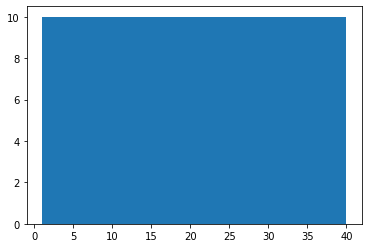

In [5]:
#Plot the label distribution, if processed correctly there should be 40 bins (1-40) all with 10 occurences
plt.hist(fileLabels, bins=40)

#Process the Images

Images will be displayed below to show that the file list was successfully created

Image Dimensions : (48, 48, 3)


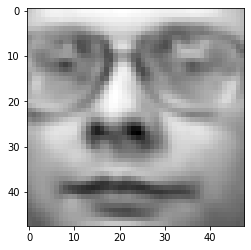

Image Dimensions : (48, 48, 3)


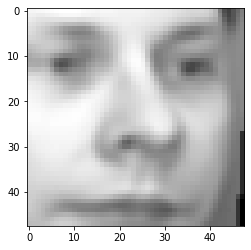

Image Dimensions : (48, 48, 3)


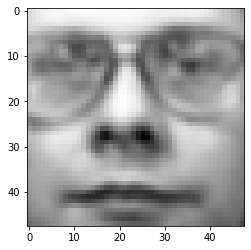

Image Dimensions : (48, 48, 3)


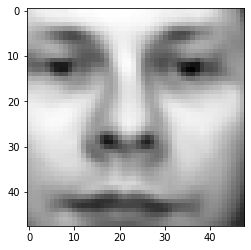

In [6]:
#Import libs for diplaying img information
import cv2
import matplotlib.image as mpimg

#Create function for displaying images in the image list
def DisplayImg(number):
  img = cv2.imread(fileList[number])
  print('Image Dimensions :', img.shape)

  img = mpimg.imread(fileList[number])
  imgplot = plt.imshow(img, cmap="gray")
  plt.show()

#Display the first four images in the list
DisplayImg(0)
DisplayImg(1)
DisplayImg(2)
DisplayImg(3)

In [32]:
#Convert each image in the fileList to an array of its pixel values
imgList = []
for file in fileList:
  img = cv2.imread(file)
  imgList.append(img)

#Change lists to np arrays
imgArr = np.asarray(imgList)
lblArr = np.asarray(fileLabels)

print(np.unique(lblArr))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


The to categoric command expects values to be 0-indexed, when it is fed values that are not 0 indexed it creates an additional column for 0 which leads to issues when trying to model. To work around this all labels will have one subtracted from them, this will force the labels to be 0 indexed. 

In [33]:
#To categoric keeps giving bad results because it expects the labels to be 0-indexed so to fix this all labels will have 1 subtracted from them
for i, lbl in enumerate(lblArr):
  lblArr[i] = lblArr[i]-1

#Confirm it worked
print(np.unique(lblArr))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


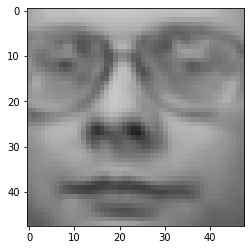

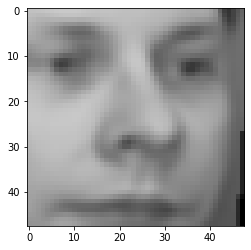

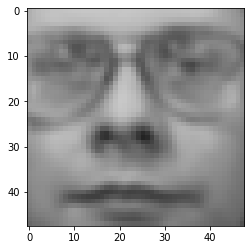

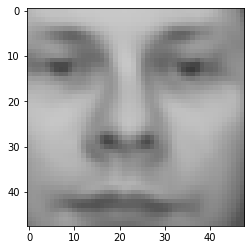

In [9]:
#To confirm that the images were correctly convereted to their pixels they will be plotted with plt.imshow()
def printPixels(img):
  plt.imshow(img)
  plt.show()

printPixels(imgArr[0])
printPixels(imgArr[1])
printPixels(imgArr[2])
printPixels(imgArr[3])

The data will be normalized by reducing all pixel values to a range between 0 and 1 and one hot encoding the labels, for the models the pixel values will be x and the labels will be y

In [10]:
from tensorflow.keras.utils import to_categorical

#Reshape x and one hot encode y
imgArr = imgArr.reshape(imgArr.shape[0],48,48,3)
lblArr = to_categorical(lblArr)

#Normalize x
imgArr_Norm = imgArr.astype('float32')
imgArr_Norm = imgArr_Norm / 255.0

#Create and Test CNN Models

The models created below are the results of extensive testing and tweaking of convolutions and max-pooling layers. 

Model 1 was orginally the best performing model from all the combinations tested. Model 2 was not as strong but was left in the test to show how a more complex model did not perform well on this dataset. Model 3 is included in the test to show how a very simple model will perform on the dataset. Model 4 was added to the test after testing the first three models multiple times, model 4 combines ascepts of the 1st model and the 3rd model to attempt to improve model accuracy. 

In [11]:
#Import keras CNN libs
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#Create Models
def CNNModel1():
  #First test model
  model = Sequential([
                      Conv2D(32, kernel_size=3, activation="relu", padding="same", kernel_initializer='he_uniform', input_shape=[48, 48, 3]),
                      Conv2D(32, kernel_size=3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Conv2D(64, kernel_size=3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      Conv2D(64, kernel_size=3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Flatten(),
                      Dense(256, activation="relu"),
                      Dropout(0.5),
                      Dense(40, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
  return model

def CNNModel2():
  #Second Test Model
  model = Sequential([
                      Conv2D(128, kernel_size=6, activation="relu", padding="same", kernel_initializer='he_uniform', input_shape=[48, 48, 3]),
                      Conv2D(128, kernel_size=6, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Conv2D(64, kernel_size=6, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      Conv2D(64, kernel_size=6, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Conv2D(32, kernel_size=6, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      Conv2D(32, kernel_size=6, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Flatten(),
                      Dense(128, activation="relu"),
                      Dropout(0.2),
                      Dense(40, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
  return model

def CNNModel3():
  #Third Test Model
  model = Sequential([
                      Conv2D(64, 3, activation="relu", padding="same", kernel_initializer='he_uniform', input_shape=[48, 48, 3]),
                      MaxPooling2D(2),
                      Conv2D(32, 3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      Flatten(),
                      Dense(128, activation="relu"),
                      Dropout(0.2),
                      Dense(40, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
  return model

def CNNModel4():
  #Fourth Test Model
  model = Sequential([
                      Conv2D(64, 3, activation="relu", padding="same", kernel_initializer='he_uniform', input_shape=[48, 48, 3]),
                      Conv2D(64, 3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Conv2D(32, 3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      Conv2D(32, 3, activation="relu", padding="same", kernel_initializer='he_uniform'),
                      MaxPooling2D(2),
                      Flatten(),
                      Dense(256, activation="relu"),
                      Dropout(0.2),
                      Dense(40, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
  return model

In [12]:
#Summarize the learning of the models
def summarizeLearning(learning):
  plt.title('Cross Entropy Loss')
  plt.plot(learning.history['loss'], color='purple', label='train')
  plt.plot(learning.history['val_loss'], color='orange', label='test')
  plt.show()

  # plot accuracy
  plt.title('Classification Accuracy')
  plt.plot(learning.history['accuracy'], color='pink', label='train')
  plt.plot(learning.history['val_accuracy'], color='lime', label='test')
  plt.show()

In [13]:
#Display the models confusion matrixs as heatmaps
from sklearn.metrics import confusion_matrix
def displayConfusionMatrixAsHeatMap(xTest, yTest, model):
  #Get predictions
  y_pred = model.predict(xTest)

  #Use argmax to convert from one-hot encoded back to labels
  y_pred_int = np.argmax(y_pred, axis=1)
  y_true = np.argmax(yTest, axis=1)

  #Create confusion matrix
  my_confusion_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred_int, labels=labelList)
  pd.DataFrame(my_confusion_matrix, index=labelList, columns=labelList)

  #Plot confusion matrix
  fig, ax = plt.subplots(figsize=(18,18))
  sns.heatmap(my_confusion_matrix, annot=True, linewidths=.5, square = True, cmap="BuPu", ax=ax)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

In [15]:
#Break up data into training and testing set using 70/30 split
x = imgArr_Norm
y = lblArr

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [16]:
#Get Models
firstModel = CNNModel1()
secondModel = CNNModel2()
thirdModel = CNNModel3()
fourthModel = CNNModel4()

Each model tested will have its cross entropy loss, and classification accuracy plotted, as well as its confusion matrix plotted as a heat map. 

##First Model

In [17]:
#Summarize and fit first model
firstModel.summary()
firstHistory = firstModel.fit(xTrain, yTrain, epochs=15, batch_size=32, validation_data=(xTest, yTest))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

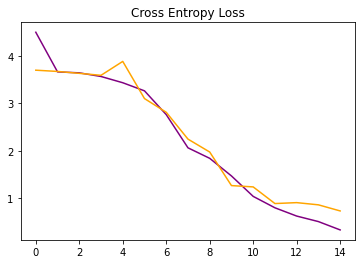

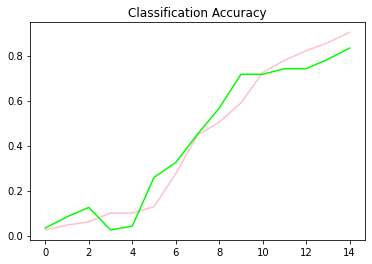

In [18]:
#Graph the results of the first model and print the accuracy percentage
summarizeLearning(firstHistory)

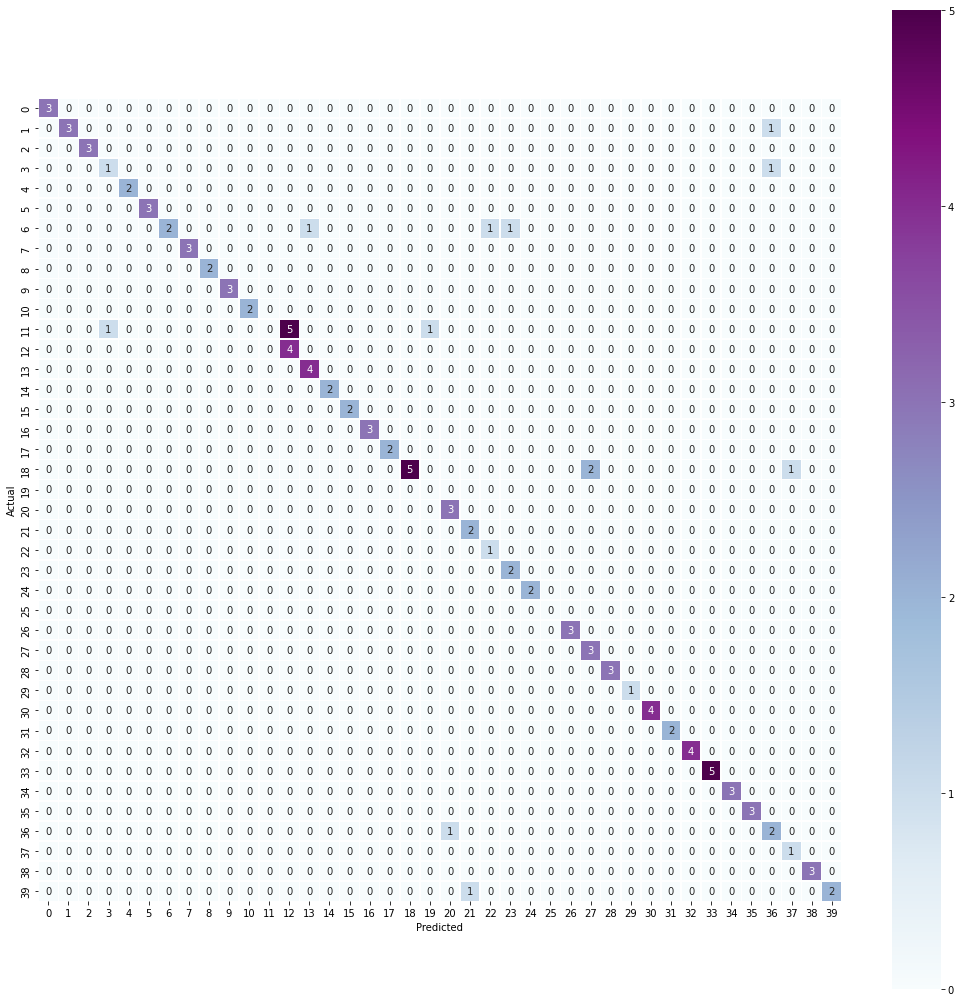

In [19]:
#Display confusion matrix as heat map for model1
displayConfusionMatrixAsHeatMap(xTest, yTest, firstModel)

##Second Model

In [20]:
#Summarize and fit the second model
secondModel.summary()
secondHistory = secondModel.fit(xTrain, yTrain, epochs=15, batch_size=32, validation_data=(xTest, yTest))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 128)       13952     
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       589952    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        294976    
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        147520    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

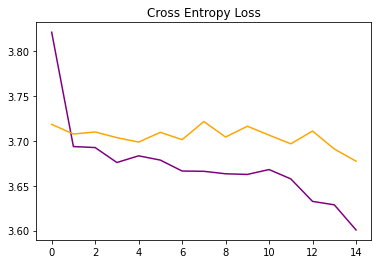

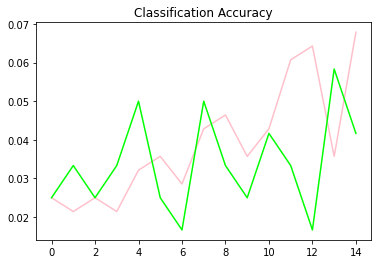

In [21]:
#Summarize the learning
summarizeLearning(secondHistory)

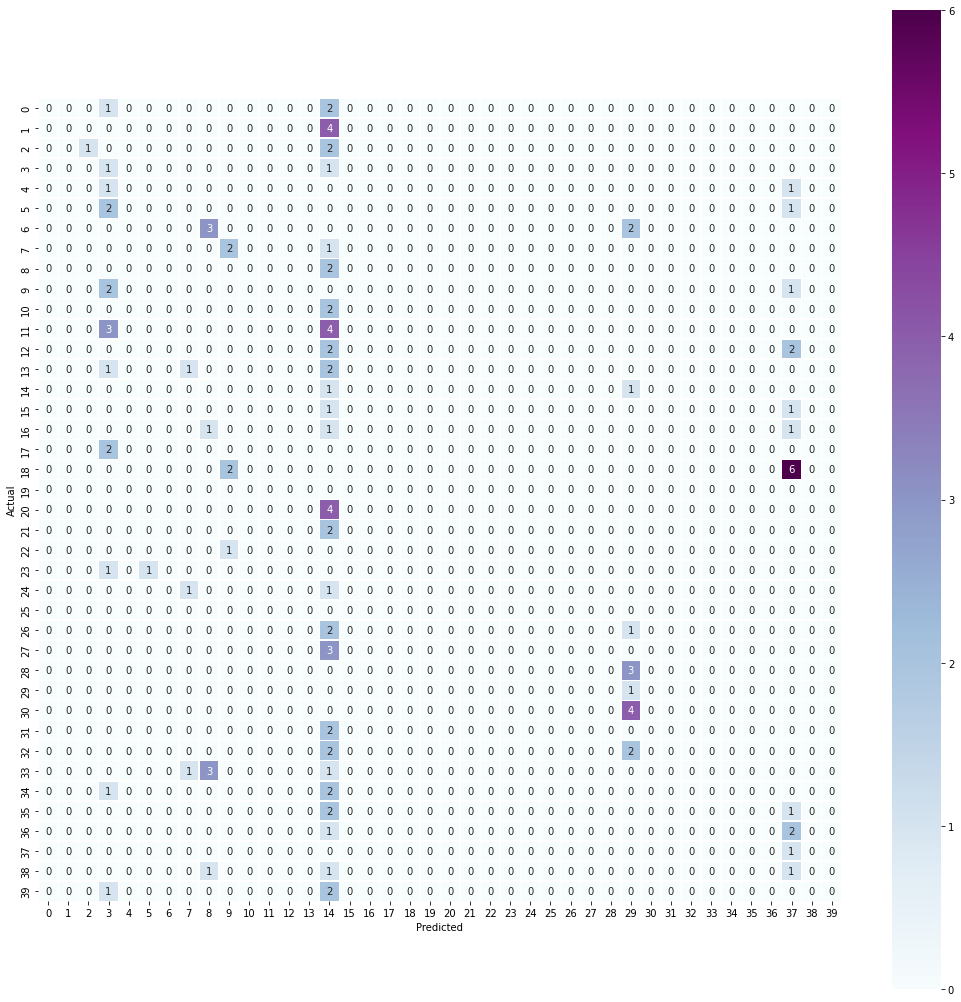

In [22]:
displayConfusionMatrixAsHeatMap(xTest, yTest, secondModel)

##Third Model

In [23]:
#Summarize and fit the third model
thirdModel.summary()
thirdHistory = thirdModel.fit(xTrain, yTrain, epochs=15, batch_size=32, validation_data=(xTest, yTest))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2359424   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

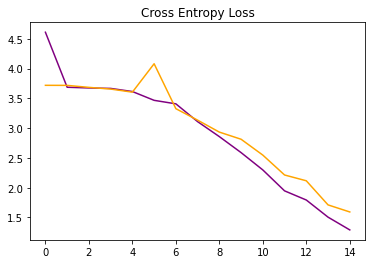

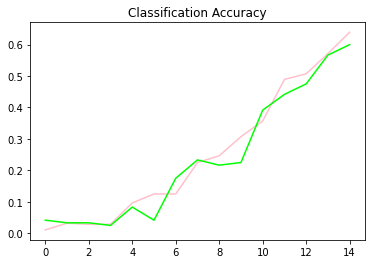

In [24]:
#Summarize model learning
summarizeLearning(thirdHistory)

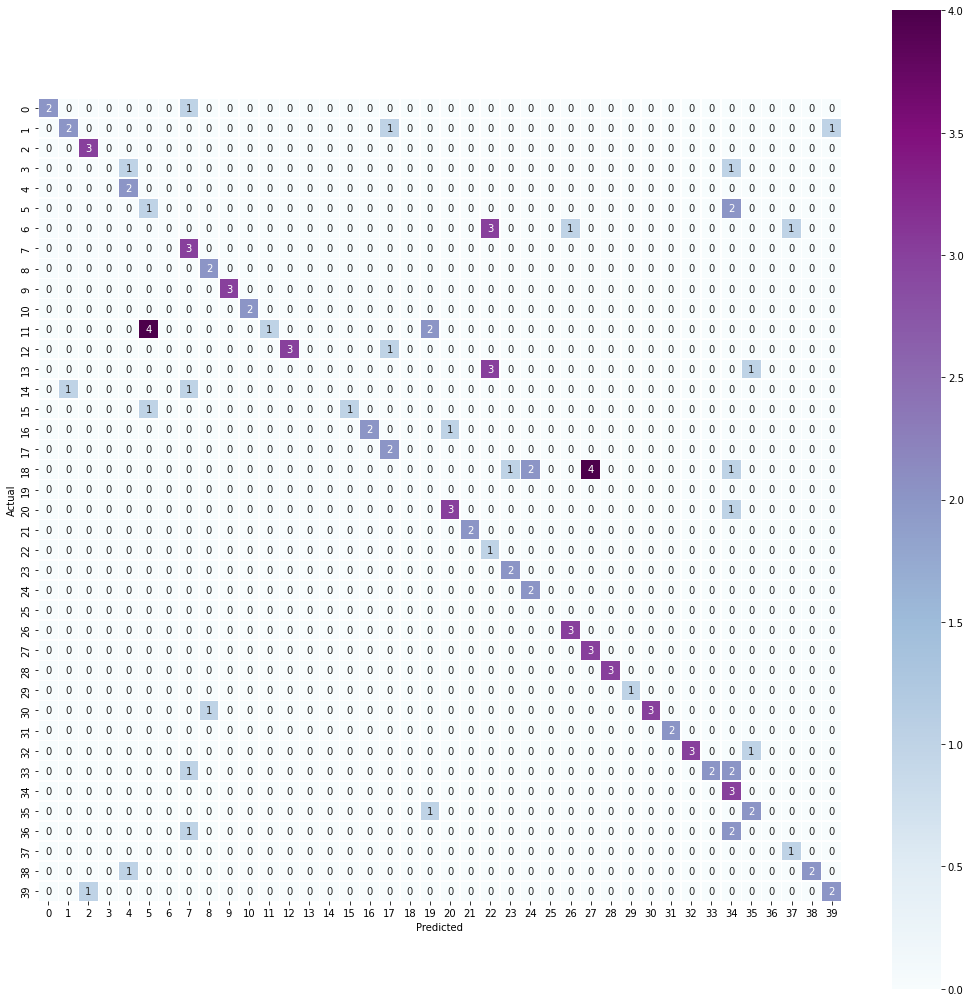

In [25]:
displayConfusionMatrixAsHeatMap(xTest, yTest, thirdModel)

##Model 4

In [26]:
#Summarize and fit fourth model
fourthModel.summary()
fourthHistory = fourthModel.fit(xTrain, yTrain, epochs=15, batch_size=32, validation_data=(xTest, yTest))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

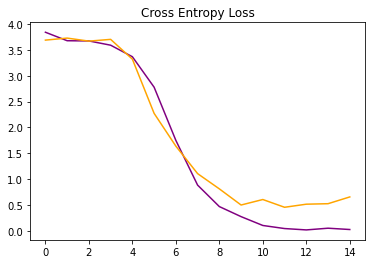

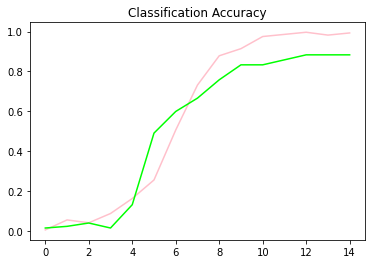

In [27]:
#Summarize model learning
summarizeLearning(fourthHistory)

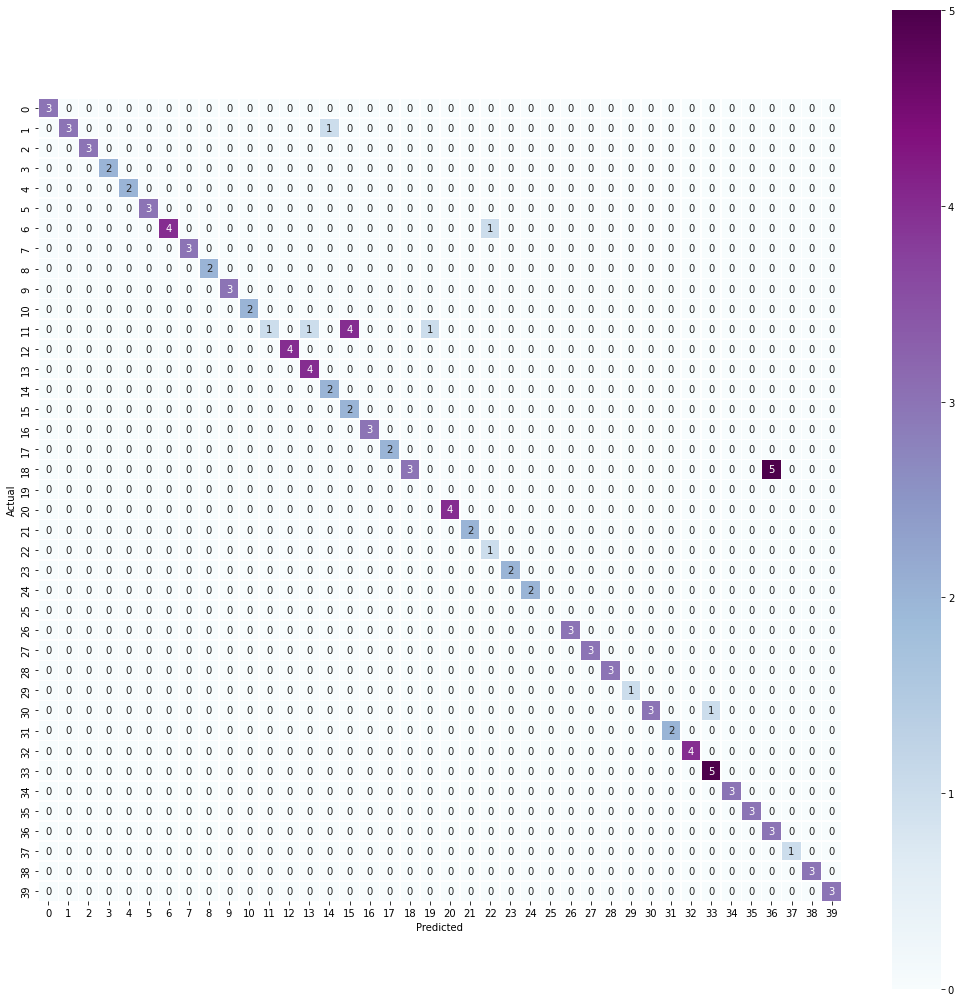

In [28]:
#Display confusion matrix as a heat map
displayConfusionMatrixAsHeatMap(xTest, yTest, fourthModel)

#Model Comparsion

4/4 [==============================] - 0s 11ms/step - loss: 0.6593 - accuracy: 0.8833


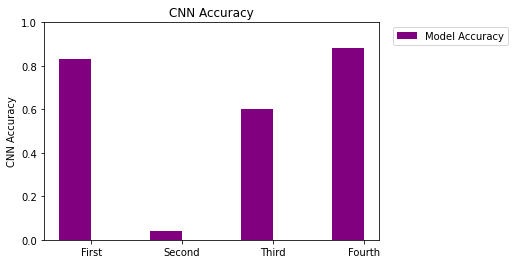

In [29]:
#Compute the three models accuracy and loss scores using the evaluate method
first_loss, first_accuracy = firstModel.evaluate(xTest, yTest)
second_loss, second_acc = secondModel.evaluate(xTest, yTest)
third_loss, third_acc = thirdModel.evaluate(xTest, yTest)
fourth_loss, fourth_acc = fourthModel.evaluate(xTest, yTest)

#Accuracy Scores First
labels = ['First', 'Second', 'Third', 'Fourth']
accuracy_scores = [first_accuracy, second_acc, third_acc, fourth_acc]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Model Accuracy', color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CNN Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('CNN Accuracy')
plt.show()

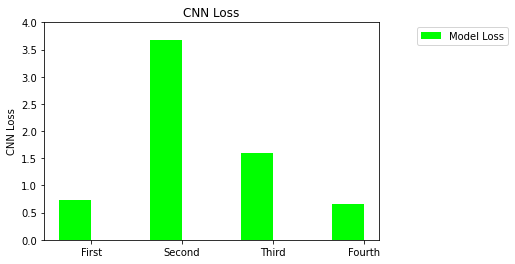

In [30]:
#Loss Scores Second
labels = ['First', 'Second', 'Third', 'Fourth']
loss_scores = [first_loss, second_loss, third_loss, fourth_loss]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, loss_scores, width, label='Model Loss', color='lime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CNN Loss')
ax.set_xticks(x)
ax.set_ylim(0,4)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('CNN Loss')
plt.show()

#Report Summary

The facesDM dataset is comprised of 40 folders, each containing 10 images. Each subdirectory represents a person, 10 images per person. The goal of the CNNs created in this test is to be able to perform facial recognition, tying the image to the person on this dataset. 

****

**Data Importing**

The data was imported from github using the web get command line parameter (google collab allows invoking of command line parameters using !). After being imported the dataset was unzipped using the unzip command line parameter. The folders unzipped were then iterated through and all the images were placed in a list, an addtitional list was also created for each image label. 

****

**Data Normalization**

Once the image paths were all in the same list the list was iterated over and each image was converted to a 2d 48x48 array of its pixels using the cv2.imread command. As described in the report each label also had one subtracted from it thereby making the labels 0-indexed. After this the pixel values were normalized to be in a range between 0 and 1, and the labels were one hot encoded. In the models tested the normalized pixels were used as x and the one hot encoded labels were used as y.

****

**Models**

For this dataset a 70/30 training testing split was used instead of the normal 80/20 split due to the datasets size.

The models created are the results of multiple tests. At first the models created were very complex with three to four layers of convolutions and max pooling. This led to models  with classification accuracy at best in the mid to low 20%s. To improve model performance convolutions with less number of filters per convolution, and overall less convolutions and layers of max pooling were created. From testing these models perfomed much better on average having classification accuracries in the 70 to 80%s.

**Model 1**

Model 1 was the best performing model of the models tested with convolution layers that had lower numbers of filters. In the final test ran this model had a training classification accuracy of 90% and a testing classification accuracy of 83%. 

**Model 2**

Model 2 was one of the more complex models that was first tested. In the final test this model performed terribly with a training classication accuracy of 7% and a testing classification accuracy of 4%.

**Model 3**

Model 3 was included in the test to show how a very basic model performed compared to model 1 and the more complex model 2. From testing on average this model performed better then expected, and in the final test had a training classification accuracy of 64% and a testing classification accuracy of 60%.

**Model 4**

The test was orginally going  to only have three models, but after seeing the performance of model 3 a fourth model, model 4, was added to the test. Model 4 combines aspects of model 1 and model 3 in an attempt to improve classification accuracy. What was combined was the number of layers in model 1, two convolutions and one max pooling layer repeated twice, with the order of the number of filters used in model 3, 64 filters in first two convolutions and 32 in the last two. This worked but may have worked to well as the training classification accuracy was over 99% indicating the model may be overfitting, the testing classification accuracy was 88%.

**Conclusions**

One suprising takeaway from this test is that for this dataset simpiler models performed better then complex ones. Any more then four layers of convolutions led to very low classification accuracies, and any number of filters per layer greater then 64 also led to the same result. This could be due to the size of the images as 48x48 is somewhat small for an image. As for the model performance, in terms of just classification score model 4 was the best performing CNN, but due to its very high training classification score this may be due to overfitting, and model 1 could be the better peforming CNN if tested with additional data. 